# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 5 - Normalización
### Pilar García Murillo y Sonia Ruiz Pérez

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [1]:
# Importamos las librerías necesarias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kstest

pd.options.display.max_rows=None   #Para que se muestren todas las columnas de los dataframes.

In [2]:
#Creamos un dataframe con el csv de los datos de nuestro estudio.
df = pd.read_csv("files/taxis1.csv", index_col=0)
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


/home/solkiria/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


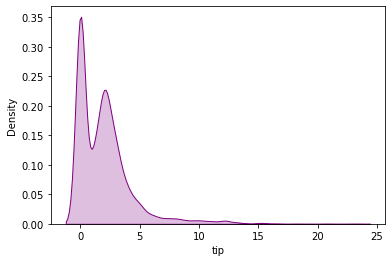

In [3]:
#Representamos la variable respuesta (dependiente) para recordar su distribución.
sns.distplot(
    df["tip"], 
    hist = False, 
    color = "purple", 
    kde_kws = {"shade": True, "linewidth": 1});

In [4]:
#Comprobamos cual es el valor mínimo de nuestra variable respuesta (dependiente).
df['tip'].min()

0.0

In [5]:
#Intentamos transformar los datos de nuestra variable dependiente con box cox, ya que
#  esta variable no tiene una distribución normal.
df['tip_box'],lambda_ajustada = stats.boxcox(df['tip'])

ValueError: Data must be positive.

`Al intentar hacer el BoxCox de nuestra variable respuesta ('tip'), nos da error porque en alguna de nuestras celdas tenemos 0, y no se puede hacer el logaritmo de 0. Por tanto vamos a cambiar los valores de 0 por valores muy pequeños cercanos a 0, pero que serán positivos.`

In [6]:
#Reemplazamos todos los valores de esta columna que sean 0 por 0,0000000001   .
df['tip_no_zeros']=df['tip'].replace(0,0.0000000001,inplace=False,regex=False)

In [7]:
#Volvemos a intentar transformar los datos de nuestra variable dependiente con box cox.
df['tip_box'],lambda_ajustada = stats.boxcox(df['tip_no_zeros'])

In [10]:
#Mostramos el valor de lambda ajustada porque nos hará falta para hacer la inversa de esta normalización.
lambda_ajustada

0.07462469096512592

In [11]:
#Comprobamos nuestro dataframe
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_no_zeros,tip_box
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2.150000e+00,0.787753
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,1.000000e-10,-10.996744
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2.360000e+00,0.886769


/home/solkiria/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/solkiria/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


''

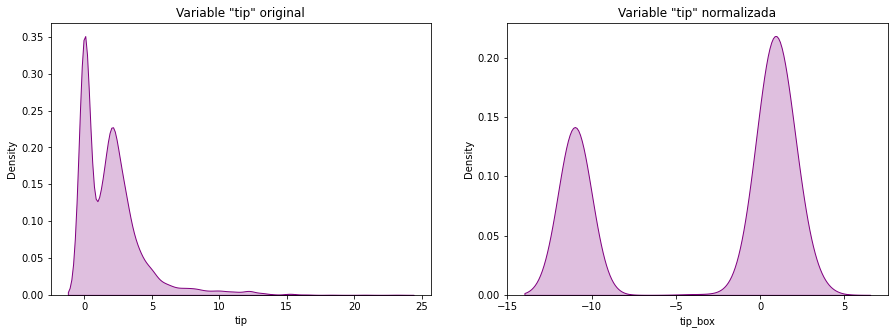

In [12]:
#Representamos la variable respuesta (dependiente) con su distribución sin normalizar (izquierda) y
#  normalizada con Boxcox (derecha).
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

#Ponemos título a las gráficas
axes[0].set_title('Variable "tip" original')
axes[1].set_title('Variable "tip" normalizada')

sns.distplot(df["tip"],hist = False,color = "purple",kde_kws = {"shade": True, "linewidth": 1},ax=axes[0])
sns.distplot(df["tip_box"],hist = False,color = "purple",kde_kws = {"shade": True, "linewidth": 1},ax=axes[1])
;

`Observamos que al normalizar nuestra variable 'tip' y representar su distribución, sí se observan cambios, pero sigue sin ajustarse a una unica campana de Gauss (distribución normal), ya que se observan dos campanas. Creemos que esto podría deberse a los valores 0, ya que no los hemos eliminado, sino que los hemos sustituido por 1e-09. Pensamos que si eliminamos los valores 0 de la columna 'tip' puede que tengamos una distribución normal.`

In [13]:
#Comprobamos la normalidad con el test de Kolmogorov-Smirnov ya que tenemos más de 5000 registros.
kstest(df['tip_box'],'norm')

KstestResult(statistic=0.3551184451716434, pvalue=0.0)

`Al observar que el p-valor es menos a 0,05, podemos rechazar la hipótesis nula (H0) que dice que nuestros datos tienen una distribución normal, por tanto nuestros datos no tienen distribución normal tras intentar normalizarlos.`

In [14]:
#Guardamos el dataframe en csv.
df.to_csv('files/taxis2_norm.csv')

Happy coding 📈📊📉